# Explore here

It's recommended to use this notebook for exploration purposes.

In [16]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [17]:
url = "https://www.mlb.com/stats/san-francisco-giants/all-time-by-season"

response = requests.get(url)

if response.status_code == 200:
    print("Page fetched successfully!")
else:
    print(f"Failed with status code: {response.status_code}")


Page fetched successfully!


In [18]:
print(response.text[:500])

<!DOCTYPE html>
<html lang="en">
<head>
        <script defer id="dd-rum">
          (() => {
            try {
              if (!window.DD_RUM) {
              (function(h, o, u, n, d) {
                h = h[d] = h[d] || {
                q: [],
                onReady: function(c) {
                  h.q.push(c)
                }
                };
                d = o.createElement(u);
                d.async = 1;
                d.src = n;
                n = o.getElementsByTagName(u)[0];


In [19]:
from bs4 import BeautifulSoup

# Step 4: Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Pretty-print the first 500 characters of the parsed HTML
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script defer="" id="dd-rum">
   (() => {
            try {
              if (!window.DD_RUM) {
              (function(h, o, u, n, d) {
                h = h[d] = h[d] || {
                q: [],
                onReady: function(c) {
                  h.q.push(c)
                }
                };
                d = o.createElement(u);
                d.async = 1;
                d.src = n;
                n = o.getElementsByTagName(u)[0];
        


In [20]:
table = soup.find_all("table")
print(table[:500])

[<table aria-label="Stats Table" class="bui-table is-desktop-HChWpztF"><colgroup span="3"></colgroup><colgroup span="2"></colgroup><colgroup span="6"></colgroup><colgroup span="2"></colgroup><colgroup span="2"></colgroup><colgroup span="4"></colgroup><thead><tr><th class="pinned-col-T0Jkz2nh col-group-start-Gn6clGbi number-GoaicxKV first-col-hKqk_bGN header-_PPXDbaa is-table-pinned-lGP8KWTK" data-col="0" data-row="h1" id="tb-316-header-col0" scope="col"><button aria-label="Player Column Sort" class="column-header-container-x7DJ3Fgp no-select-hDruNBDu"><div><abbr class="bui-text cellheader bui-text">PLAYER</abbr></div><div class="mobile-header-extra-AGgURvvT"><div></div><div></div></div></button><div class="column-header-container-x7DJ3Fgp no-select-hDruNBDu"><div><abbr class="bui-text cellheader bui-text">PLAYER</abbr></div><div class="mobile-header-extra-AGgURvvT"><div></div><div></div></div></div></th><th class="number-GoaicxKV header-_PPXDbaa align-left-L6MdxTlJ is-table-pinned-lGP8

In [21]:
print(f"number of tables found = {len(table)}")


number of tables found = 1


In [22]:
isinstance(table, list) 


True

In [23]:
table_data = table[0]
columns = []

abbr_elemets = table_data.find_all("abbr", class_= "bui-text cellheader bui-text")

# Loop through the rows in the table
for abbr in abbr_elemets:
    
    
    # Extract the text from each cell and strip any surrounding whitespace
    column_label = abbr.text.strip()
    
    # Append the row data to our list
    columns.append(column_label)

# Print the first few rows of extracted data
print(columns)






['PLAYER', 'PLAYER', 'YEAR', 'YEAR', 'TEAM', 'TEAM', 'G', 'G', 'AB', 'AB', 'R', 'R', 'H', 'H', '2B', '2B', '3B', '3B', 'HR', 'HR', 'RBI', 'RBI', 'BB', 'BB', 'SO', 'SO', 'SB', 'SB', 'CS', 'CS', 'AVG', 'AVG', 'OBP', 'OBP', 'SLG', 'SLG']


In [24]:
#soup = html_data
tables = soup.find_all('table')
tables
print(type(tables))
print(f"Number of tables found: {len(tables)}]")
table = tables[0]
columns = []
abbr_elements = table.find_all("abbr", "bui-text cellheader bui-text")
abbr_elements_final = table.find_all("abbr", "bui-text cellheader selected-1vxxHvFg bui-text")
updated_abbr_list = abbr_elements + abbr_elements_final
for abbr in updated_abbr_list:
    # get the column label
    column_label = abbr.text.strip()
    # add the column label to the list if it's not already in the list to avoid duplicates
    if column_label not in columns:
        columns.append(column_label)
columns

columns.append('OPS')
columns




<class 'bs4.element.ResultSet'>
Number of tables found: 1]


['PLAYER',
 'YEAR',
 'TEAM',
 'G',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'BB',
 'SO',
 'SB',
 'CS',
 'AVG',
 'OBP',
 'SLG',
 'OPS']

In [25]:
# Initialize an empty list to hold the rows of data
table_data_rows = []

tr_tags = table_data.find_all("tr")


# Loop through the rows in the table
for tr in tr_tags[1:]:
    # Extract the cells from the row
    row = []
    player_cells = tr.find_all('span', class_ = "short-IiSPVSQp")

    player_name = ' '.join(span.text for span in player_cells)

    row.append(player_name)

    # Extract the text from each cell and strip any surrounding whitespace
    row_data = [row.append(td.text.strip()) for td in tr.find_all('td')]
    
    # Append the row data to our list
    table_data_rows.append(row)

# Print the first few rows of extracted data
print(table_data_rows[:5])

[['B Bonds', '2004', 'SF', '147', '373', '129', '135', '27', '3', '45', '101', '232', '41', '6', '1', '.362', '.609', '.812', '1.421'], ['B Bonds', '2002', 'SF', '143', '403', '117', '149', '31', '2', '46', '110', '198', '47', '9', '2', '.370', '.582', '.799', '1.381'], ['B Bonds', '2001', 'SF', '153', '476', '129', '156', '32', '2', '73', '137', '177', '93', '13', '3', '.328', '.515', '.863', '1.378'], ['B Bonds', '2003', 'SF', '130', '390', '111', '133', '22', '1', '45', '90', '148', '58', '7', '0', '.341', '.529', '.749', '1.278'], ['B Bonds', '1993', 'SF', '159', '539', '129', '181', '38', '4', '46', '123', '126', '79', '29', '12', '.336', '.458', '.677', '1.135']]


In [26]:
import pandas as pd

# Create a DataFrame from the table data
df = pd.DataFrame(table_data_rows, columns = columns)

# Rename the columns based on the header row (assuming the first row is the header)
#df.columns = df.iloc[0]  # Set the first row as column headers
df = df.drop(0)  # Drop the header row from the data

# Display the first few rows of the DataFrame
df.head(20)

,PLAYER,YEAR,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
1,B Bonds,2002,SF,143,403,117,149,31,2,46,110,198,47,9,2,.370,.582,.799,1.381
2,B Bonds,2001,SF,153,476,129,156,32,2,73,137,177,93,13,3,.328,.515,.863,1.378
3,B Bonds,2003,SF,130,390,111,133,22,1,45,90,148,58,7,0,.341,.529,.749,1.278
4,B Bonds,1993,SF,159,539,129,181,38,4,46,123,126,79,29,12,.336,.458,.677,1.135
5,B Bonds,2000,SF,143,480,129,147,28,4,49,106,117,77,11,3,.306,.440,.688,1.128
6,W McCovey,1969,SF,149,491,101,157,26,2,45,126,121,66,0,0,.320,.453,.656,1.109
7,M Ott,1929,NYG,150,545,138,179,37,2,42,151,113,38,6,--,.328,.449,.635,1.084
8,W Mays,1954,NYG,151,565,119,195,33,13,41,110,66,57,8,5,.345,.411,.667,1.078
9,B Bonds,1996,SF,158,517,122,159,27,3,42,129,151,76,40,7,.308,.461,.615,1.076
10,B Bonds,1994,SF,112,391,89,122,18,1,37,81,74,43,29,9,.312,.426,.647,1.073


In [27]:

# # Convert the query result to a DataFrame for plotting
# #plot_df = pd.DataFrame(data, columns=['YEAR', 'R'])
# # Plot the runs over time
# #plt.figure(figsize=(10, 6))
# sns.lineplot(x='YEAR', y='R', data=plot_df, marker='o', label='Runs')
# # Set the labels and title
# plt.xlabel('Year')
# plt.ylabel('Runs')
# plt.title('San Francisco Giants Runs Over Time')
# # Rotate x-axis labels if necessary
# plt.xticks(rotation=45)
# # Display the plot
# plt.tight_layout()
# plt.legend()
# plt.grid(True)
# plt.show()

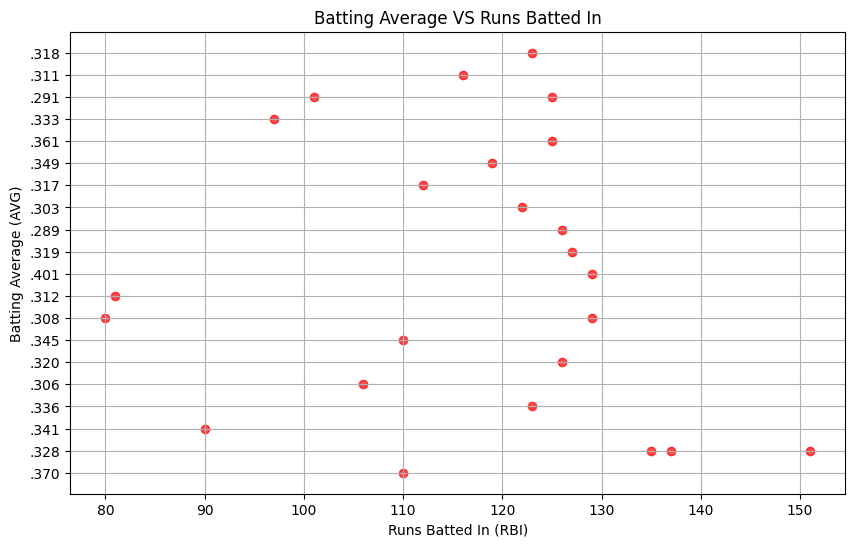

In [28]:
# Looking to create a scatterplot of the AVG along the y-axis and RBIs along the x-axis
# Need to get the RBIs in numeric order
df['RBI'] = pd.to_numeric(df['RBI'], errors='coerce')
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['RBI'], df['AVG'], color='r', alpha=0.7)
plt.title('Batting Average VS Runs Batted In')
plt.xlabel('Runs Batted In (RBI)')
plt.ylabel('Batting Average (AVG)')
plt.grid(True)
plt.show()

/tmp/ipykernel_596/391189639.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


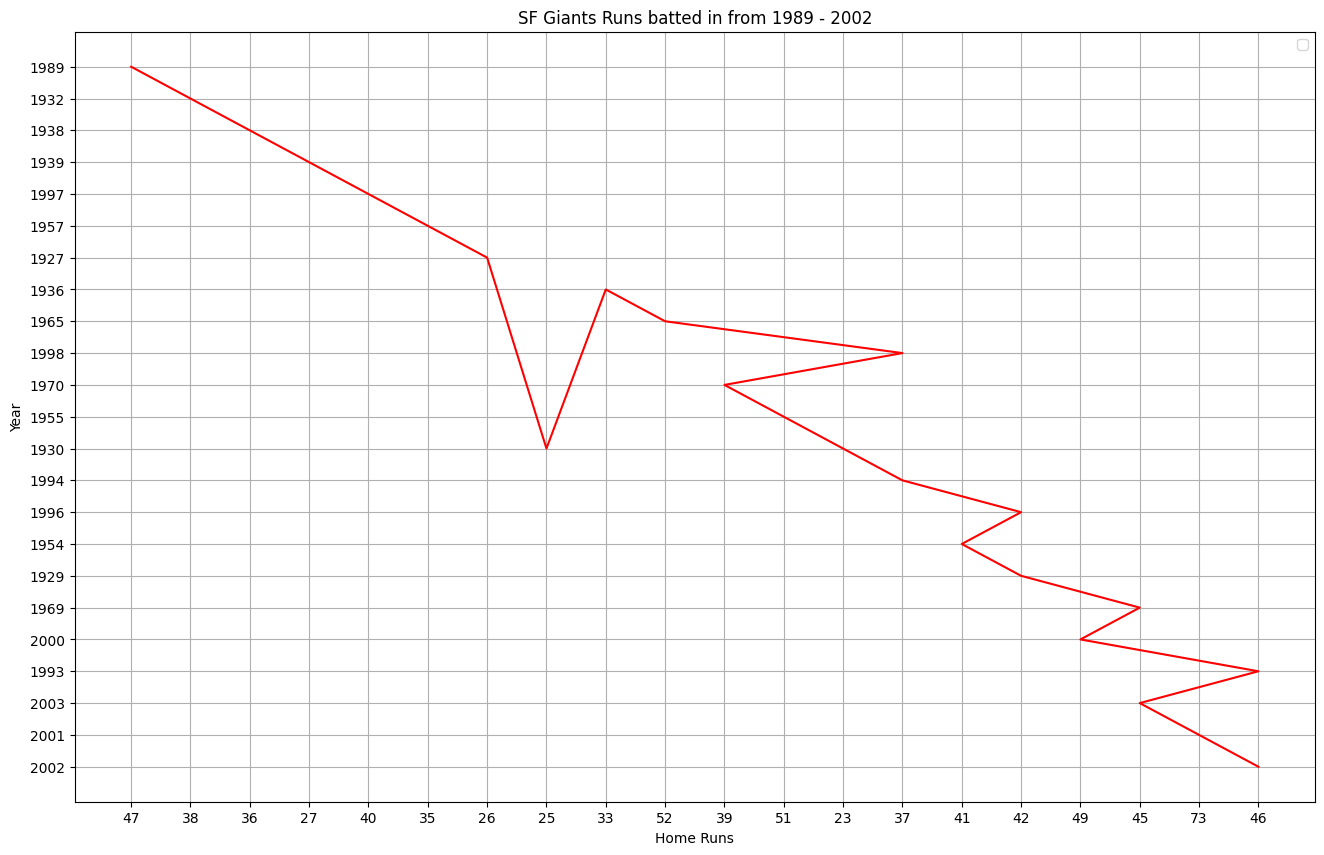

In [29]:
import matplotlib.pyplot as plt

# Data
df['RBI'] = pd.to_numeric(df['RBI'], errors='coerce')

# Plot
plt.figure(figsize=(16, 10))
plt.plot(df['HR'], df['YEAR'], color='r')
plt.gca().invert_xaxis()

# Labels and title

plt.xlabel("Home Runs")
plt.ylabel("Year")
plt.title("SF Giants Runs batted in from 1989 - 2002")
plt.grid(True)
plt.legend()

# Display the graph
plt.show()

/tmp/ipykernel_596/2032834916.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


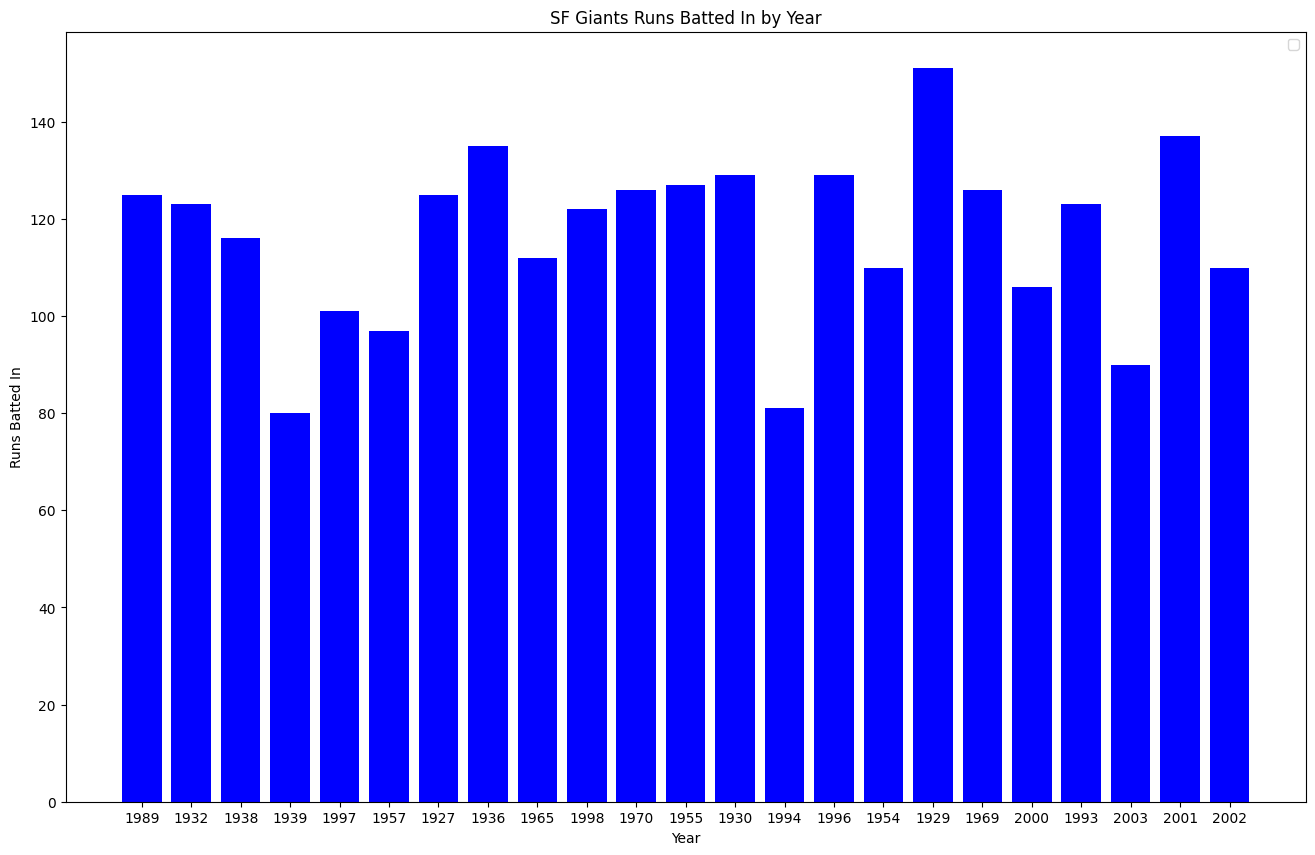

In [30]:
import matplotlib.pyplot as plt

# Data
df['RBI'] = pd.to_numeric(df['RBI'], errors='coerce')

# Plot
plt.figure(figsize=(16, 10))
plt.bar(df['YEAR'], df['RBI'], color='b')
plt.gca().invert_xaxis()

# Labels and title

plt.xlabel("Year")
plt.ylabel("Runs Batted In")
plt.title("SF Giants Runs Batted In by Year")
plt.grid(False)
plt.legend()

# Display the graph
plt.show()